# Perceptron Lernalgorithmus

Letzter Gewichtsvektor: [-1.  1.  1.]

Ausgabe mit Trainingsset: 
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


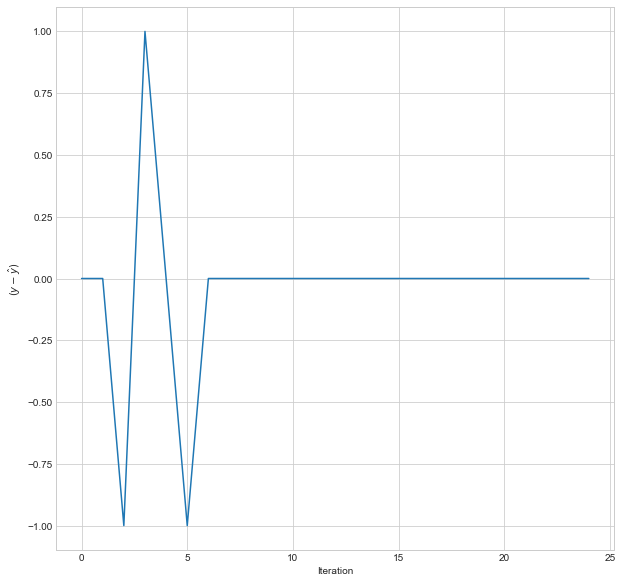

In [28]:
# Für grafische Darstellung
import matplotlib.pyplot as plt
# Zufallsgenerator
from random import choice
# Für mathematische Operationen
from numpy import array, dot, random, linspace, zeros

%matplotlib inline

# Set mit Ordnung Bias | Input A | Input B | gewünschter Output
trainings_set = [
    (array([1, 0, 0]), 0),
    (array([1, 0, 1]), 1),
    (array([1, 1, 0]), 1),
    (array([1, 1, 1]), 1),
]

# Lernfunktion
def heaviside(value):
    return 0 if value < 0 else 1

# Zufallsgenerator mit seed
random.seed(18)

# Gewichte initialisieren
w = zeros(3)

def fit(trainings_set, w, iterations=25):
    errors = []
    weights = []
    
    for i in range(iterations):
        # Zufälligen Input ermitteln
        example = choice(trainings_set)
        x = example[0]
        y = example[1]
        # Tatsächlichen Output ermitteln
        y_hat = heaviside(dot(w, x))
        # Fehler ermitteln
        error = y - y_hat
        # Fehler und Gewicht für Auswertung speichern
        errors.append(error)
        weights.append(w)
        # Gewichte anpassen
        w += error * x
    return errors, weights

errors, weights = fit(trainings_set, w)
print("Letzter Gewichtsvektor: " + str(weights[-1]))

print("\nAusgabe mit Trainingsset: ")
for x, y in trainings_set:
    y_hat = heaviside(dot(x, w))
    print("{}: {} -> {}".format(x, y, y_hat))
    
# Fehlergraph
fignr = 1
plt.figure(1, figsize=(10, 10))
plt.plot(errors)
plt.style.use('seaborn-whitegrid')
plt.xlabel('Iteration')
plt.ylabel(r'$(y - \hat y)$')
plt.show()

## Basisbeispiel mit sklearn

[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


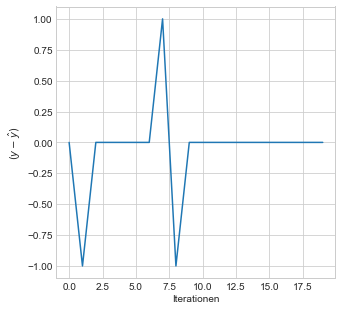

In [29]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline

class PerceptronEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, n_iterations=20, random_state=None):
        self.n_iterations = n_iterations  # Anzahl iterationen fürs lernen
        self.random_state = random_state  # Random Seed für Zufallsgenerator
        self.errors = []  # Fehler im Lernprozess für plot
    
    # Stepfunction für einzelne Neuronen
    def heaviside(self, x):
        if x < 0:
            return 0
        return 1
    
    # Lern/ Trainingsfunktion X -> [N,D], N = Zeilen = Anzahl Lernbeispiele, D = Spalten = Anzahl Features, y -> [N]
    def fit(self, X=None, y=None):
        self.random_state_ = check_random_state(self.random_state)
        self.w = self.random_state_.random_sample(np.size(X, 1))  # Initialisiere Gewichte zufällig
        X, y = check_X_y(X, y)  # Checke auf richtiges Format -> X.shape[0] == y.shape[0]
        self.classes = unique_labels(y) # Eindeutige Zielwerte speichern
        # Lerndaten für spätere Prüfung in predict speichern
        self.X_ = X
        self.y_ = y
        # Lernvorgang
        for i in range(self.n_iterations):
            # Zufälliges vermischen für Batch Size 1
            rand_index = self.random_state_.randint(0, np.size(X, 0))
            # Zufälliger Input Vektor
            x_ = X[rand_index]
            # Erwarteter Output
            y_ = y[rand_index]
            # Tatsächlicher Output
            y_hat = self.heaviside(np.dot(self.w, x_))
            # Fehler errechnen
            error = y_ - y_hat
            self.errors.append(error) # Für Visualisierung sammeln
            self.w += error * x_  # Neue Gewichte ermitteln
        return self
    
    # Auswerten eines beliebigen Input Vektors x
    def predict(self, x):
        check_is_fitted(self, ['X_', 'y_'])
        y_hat = self.heaviside(np.dot(self.w, x))
        return y_hat
    
    # Fehlergraph anzeigen
    def plot_error(self):
        plt.figure(1, figsize=(5, 5))  # Erster Parameter ist figure_num
        plt.plot(self.errors)
        plt.style.use('seaborn-whitegrid')
        plt.xlabel('Iterationen')
        plt.ylabel(r'$(y - \hat y)$')
        plt.show()
        
# Testarray und Test Ziel definieren
X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([0, 1, 1, 1])

# Lernen mit dem neuen NN
Perceptron = PerceptronEstimator(20, 10)
Perceptron.fit(X, y)

for index, x in enumerate(X):
    p = Perceptron.predict(x)
    print("{}: {} -> {}".format(x, y[index], p))

# Fehlergraph
Perceptron.plot_error()

## scikit-learn-Perceptron-Estimator

In [28]:
from sklearn.datasets import load_iris  # Für das Schwertlilien Datenset
from sklearn.linear_model import Perceptron  # Standard perceptron aus sklearn

iris = load_iris()  # Datensatz laden
X = iris.data[:,(2,3)]  # Länge und Breite der Blütenblätter
y = iris.target  # Zielvektor

my_per = Perceptron(random_state=49, max_iter=10000, tol=None)  # tol -> Stopkriterium
my_per.fit(X, y) # Lernen der Testdaten

y_prediction = my_per.predict([[1.4, 0.2], [4.7, 1.4], [6.0, 2.5]])  # Auswerten einiger gegebenen Schwertlilien, iris-setosa, iris versicolor, iris virginca
print(y_prediction)

[0 1 2]


## Adaline 
- statt delta(gewichte) = µ * (y - ŷ) * input , wobei ŷ {0,1}
- delta(gewichte) = µ * (y - net) * input , wobei net kontinuierlicher Wert zwischen 0 und 1

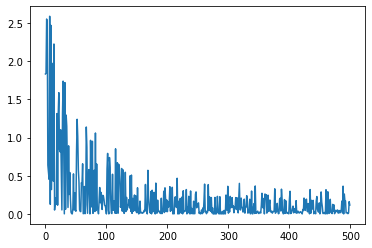

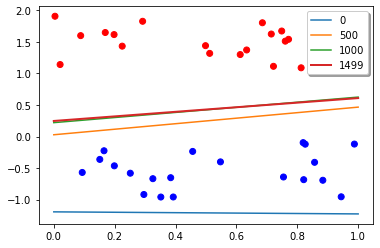

In [56]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state  # Prüfroutinen
from sklearn.utils.multiclass import unique_labels

import numpy as np
import matplotlib.pyplot as plt
from random import choice
import math

# Für inline plot anzeige
%matplotlib inline

class AdalineEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, eta=.001, n_iterations=500, random_state=None):
        self.n_iterations = n_iterations  # Iterationen für das Lernen
        self.eta = eta  # Lernrate
        self.random_state = random_state  # Seed für Zufallsgenerator
        self.errors = []  # Fehler im Lernprozess für Visualisierung
        self.w = []  # Gewichtsvektor
        self.wAll = []  # Alle Gewichte für Visualisierung
    
    # Punktprodukt aus Inputvektor und Gewichten
    def net_i(self, x):
        return np.dot(x, self.w)
    
    # Neuron, Aktivierungsfunktion
    def activation(self, x):
        return self.net_i(x)
    
    # Outputfunktion
    def output(self, x):
        if self.activation(x) >= 0.0:
            return 1
        return -1
    
    # Lernfunktion
    def fit(self, X=None, y=None):
        self.random_state_ = check_random_state(self.random_state)  # Initialisierung des Zufallsgenerators
        self.w = self.random_state_.random_sample(np.size(X, 1))  # Zufällige Initialisierung der Gewichte
        X, y = check_X_y(X, y)  # Inputvalidierung X.shape[0] == y.shape[0]
        # Initiale Lerndaten sichern
        self.X_ = X
        self.y_ = y
        
        # Lernen mit Gradientenabstieg
        for i in range(self.n_iterations):
            # Zufälliges Beispiel aus dem Datensatz zum lernen auswählen
            rand_index = self.random_state_.randint(0, np.size(X, 0))
            x_ = X[rand_index]
            y_ = y[rand_index]
            net_j = np.dot(x_, self.w)  # Net Input berechnen
            error = (y_ - net_j) ** 2  # Fehler zwischen gewünschtem Output und Net Input berechnen
            self.errors.append(error)
            
            for j in range(3):
                weight = {}
                self.w[j] += self.eta * x_[j] * (y_ - net_j)
                weight[0] = self.w[0]
                weight[1] = self.w[1]
                weight[2] = self.w[2]
                self.wAll.append(weight)  # 3 * nr_iterations
    
    # Kalkuliere Ausgabe für ein Beispielinput
    def predict(self, x):
        check_is_fitted(self, ['X_', 'y_'])
        return self.output(x)
    
    def plot(self):
        x1, x2, colors = [], [], []
        for i in range(self.X_.shape[0]):
            x1.append(self.X_[i][1])
            x2.append(self.X_[i][2])
            if self.y_[i] == 1:
                colors.append('r')  # rot
            else:
                colors.append('b')  # blau
        plt.plot(self.errors)
        plt.figure(1)
        plt.show()
        # Scatterplot
        plt.figure(2)
        plt.scatter(x1, x2, c=colors)
        x1Line = np.linspace(0.0, 1.0, 2)
        x2Line = lambda x1, w0, w1, w2: (-x1 * w1 - w0) / w2
        alpha = 0.0
        for idx, weight in enumerate(self.wAll):
            if (idx % 500 == 0):
                alpha = 1.0
                plt.plot(x1Line, x2Line(x1Line, weight[0], weight[1], weight[2]), alpha=alpha, linestyle='solid', label=str(idx), linewidth=1.5)
        plt.plot(x1Line, x2Line(x1Line, weight[0], weight[1], weight[2]), alpha=alpha, linestyle='solid', label=str(idx), linewidth=2.0)
        plt.legend(loc='best', shadow=True)

### MAIN ###
random_state = check_random_state(10)
I, o = [], []

# Datensatz aufbauen
for x in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, x, y + 1.0])
    o.append(1)
    
for x in random_state.random_sample(20):
    y = random_state.random_sample()
    I.append([1, x, y - 1.0])
    o.append(-1)
    
X = np.array(I)
y = np.array(o)

Adaline = AdalineEstimator(eta=0.01, n_iterations=500, random_state=10)
Adaline.fit(X, y)
Adaline.plot()